# 인공신경망을 이용한 주택가격지수 예측

## In Colab

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/AI 2021")

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pydot
import graphviz 
from numpy import unique
from numpy import argmax
import math
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI 2021/Dataset/house_dataset(new).csv")

In [5]:
df

,Date,Unemployment,Interest rate,Inflation,Money supply,Price Index,KOSPI,Housholds,Completion,Land price,Loan interest,Unsold home,Volume,CCSI,HP-CSI,google_trend,House_price_index
0,2008년 07월,3.1,5.5,3.8,14.8,87.2,1569.6,4076114,4388,77.5,6.9,1437,5503,75.2,108,16,84.2
1,2008년 08월,3.1,5.8,3.7,14.7,87.1,1537.6,4080403,2409,78.0,7.2,1491,3336,92.5,106,20,82.4
2,2008년 09월,3.0,5.8,4.1,14.5,87.2,1446.6,4084693,1522,78.3,7.3,1530,2538,91.4,106,13,78.8
3,2008년 10월,3.0,6.0,4.0,14.2,87.1,1201.7,4088983,1521,78.1,7.6,1981,2385,79.4,93,10,74.3
4,2008년 11월,3.0,5.6,4.3,14.0,86.8,1074.0,4093272,1603,76.0,7.4,2263,1344,74.8,84,-6,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020년 08월,3.1,0.7,0.4,9.5,105.5,2349.9,4267587,3086,100.0,2.4,56,6880,89.7,127,-14,150.2
146,2020년 09월,3.6,0.6,0.6,9.2,106.2,2371.5,4268630,5232,100.4,2.3,54,4795,81.4,115,-4,151.2
147,2020년 10월,3.7,0.6,-0.3,9.7,105.6,2357.8,4269672,7074,100.8,2.3,52,4320,92.9,120,-4,153.6
148,2020년 11월,3.4,0.7,0.6,9.7,105.5,2504.2,4270715,4832,101.2,2.4,52,4725,99.0,126,-4,156.6


In [6]:
for i in range(df.shape[0]):
    df["Date"][i]=df["Date"][i][0:4]+df["Date"][i][6:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df=df.dropna()

In [8]:
X = np.array(df.iloc[:,1:-1])
y = np.array(df.iloc[:,-1])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

### Train : 0~143( ~ 2018)
### test : 144~ (2019 ~)

In [10]:
X_macro_train=X[:144,:6]
X_macro_test=X[144:,:6]
X_micro_train=X[:144,6:]
X_micro_test=X[144:,6:]

y_train = y[:144]
y_test = y[144:]

In [19]:
df.iloc[144,]

Date                  202007
Unemployment               4
Interest rate            0.8
Inflation                0.4
Money supply              10
Price Index            104.9
KOSPI                   2196
Housholds            4266545
Completion              4425
Land price              99.6
Loan interest            2.5
Unsold home               58
Volume                 16002
CCSI                    85.9
HP-CSI                   127
google_trend               1
House_price_index      148.4
Name: 144, dtype: object

In [11]:
X_macro_train.shape

(144, 6)

# Macro data (CASE 1)
---

In [12]:
X_macro_train=X[:144,:6]
X_macro_test=X[144:,:6]

n_features = X_macro_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_macro_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_macro_test)

preds1=np.reshape(preds,(preds.shape[0],))

case1 = np.concatenate((y_train,preds1),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds1))

Epoch 1/1000
9/9 - 3s - loss: 8846.1631
Epoch 2/1000
9/9 - 0s - loss: 8398.6709
Epoch 3/1000
9/9 - 0s - loss: 8018.4785
Epoch 4/1000
9/9 - 0s - loss: 7636.9463
Epoch 5/1000
9/9 - 0s - loss: 7229.7266
Epoch 6/1000
9/9 - 0s - loss: 6742.6250
Epoch 7/1000
9/9 - 0s - loss: 6214.4551
Epoch 8/1000
9/9 - 0s - loss: 5587.6924
Epoch 9/1000
9/9 - 0s - loss: 4920.1309
Epoch 10/1000
9/9 - 0s - loss: 4229.9629
Epoch 11/1000
9/9 - 0s - loss: 3526.7893
Epoch 12/1000
9/9 - 0s - loss: 2856.1006
Epoch 13/1000
9/9 - 0s - loss: 2238.3420
Epoch 14/1000
9/9 - 0s - loss: 1723.3527
Epoch 15/1000
9/9 - 0s - loss: 1314.1776
Epoch 16/1000
9/9 - 0s - loss: 1002.0826
Epoch 17/1000
9/9 - 0s - loss: 791.1984
Epoch 18/1000
9/9 - 0s - loss: 655.9148
Epoch 19/1000
9/9 - 0s - loss: 581.6216
Epoch 20/1000
9/9 - 0s - loss: 527.1608
Epoch 21/1000
9/9 - 0s - loss: 492.0396
Epoch 22/1000
9/9 - 0s - loss: 466.4821
Epoch 23/1000
9/9 - 0s - loss: 442.9465
Epoch 24/1000
9/9 - 0s - loss: 423.5778
Epoch 25/1000
9/9 - 0s - loss: 40

# Micro data (CASE 2)
---

In [13]:
X_micro_train=X[:144,6:12]
X_micro_test=X[144:,6:12]
print(X_micro_train.shape[1])
n_features = X_micro_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_micro_train, y_train, epochs=1000, batch_size=16,verbose=2)

# evaluate on test set
preds = model.predict(X_micro_test)

preds2=np.reshape(preds,(preds.shape[0],))

case2 = np.concatenate((y_train,preds2),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds2))

6
Epoch 1/1000
9/9 - 0s - loss: 8395.9932
Epoch 2/1000
9/9 - 0s - loss: 7836.8105
Epoch 3/1000
9/9 - 0s - loss: 7259.7891
Epoch 4/1000
9/9 - 0s - loss: 6586.1567
Epoch 5/1000
9/9 - 0s - loss: 5860.1514
Epoch 6/1000
9/9 - 0s - loss: 5077.5884
Epoch 7/1000
9/9 - 0s - loss: 4265.0112
Epoch 8/1000
9/9 - 0s - loss: 3471.2764
Epoch 9/1000
9/9 - 0s - loss: 2735.4951
Epoch 10/1000
9/9 - 0s - loss: 2114.0081
Epoch 11/1000
9/9 - 0s - loss: 1608.8301
Epoch 12/1000
9/9 - 0s - loss: 1233.6844
Epoch 13/1000
9/9 - 0s - loss: 1005.6198
Epoch 14/1000
9/9 - 0s - loss: 820.4749
Epoch 15/1000
9/9 - 0s - loss: 716.5955
Epoch 16/1000
9/9 - 0s - loss: 648.8674
Epoch 17/1000
9/9 - 0s - loss: 597.1137
Epoch 18/1000
9/9 - 0s - loss: 559.3561
Epoch 19/1000
9/9 - 0s - loss: 526.9942
Epoch 20/1000
9/9 - 0s - loss: 500.0228
Epoch 21/1000
9/9 - 0s - loss: 476.4359
Epoch 22/1000
9/9 - 0s - loss: 457.0431
Epoch 23/1000
9/9 - 0s - loss: 436.2387
Epoch 24/1000
9/9 - 0s - loss: 418.3866
Epoch 25/1000
9/9 - 0s - loss: 403

# All data (CASE 3)
---

In [14]:
X_train=X[:144,[1,2,3,4,5,6,10]]
X_test=X[144:,[1,2,3,4,5,6,10]]
n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds3=np.reshape(preds,(preds.shape[0],))

case3 = np.concatenate((y_train,preds3),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds3))

Epoch 1/1000
9/9 - 0s - loss: 8463.0684
Epoch 2/1000
9/9 - 0s - loss: 7907.0034
Epoch 3/1000
9/9 - 0s - loss: 7308.4473
Epoch 4/1000
9/9 - 0s - loss: 6606.1494
Epoch 5/1000
9/9 - 0s - loss: 5860.3013
Epoch 6/1000
9/9 - 0s - loss: 5041.6270
Epoch 7/1000
9/9 - 0s - loss: 4197.3848
Epoch 8/1000
9/9 - 0s - loss: 3410.2922
Epoch 9/1000
9/9 - 0s - loss: 2661.8811
Epoch 10/1000
9/9 - 0s - loss: 2055.0190
Epoch 11/1000
9/9 - 0s - loss: 1535.0372
Epoch 12/1000
9/9 - 0s - loss: 1193.8402
Epoch 13/1000
9/9 - 0s - loss: 944.2366
Epoch 14/1000
9/9 - 0s - loss: 810.0356
Epoch 15/1000
9/9 - 0s - loss: 713.4590
Epoch 16/1000
9/9 - 0s - loss: 658.1605
Epoch 17/1000
9/9 - 0s - loss: 610.9453
Epoch 18/1000
9/9 - 0s - loss: 561.8036
Epoch 19/1000
9/9 - 0s - loss: 522.8501
Epoch 20/1000
9/9 - 0s - loss: 489.4877
Epoch 21/1000
9/9 - 0s - loss: 461.4881
Epoch 22/1000
9/9 - 0s - loss: 435.0357
Epoch 23/1000
9/9 - 0s - loss: 413.3994
Epoch 24/1000
9/9 - 0s - loss: 392.6968
Epoch 25/1000
9/9 - 0s - loss: 374.37

# CASE 4

In [15]:
X_train=X[:144,]
X_test=X[144:,]
n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds4=np.reshape(preds,(preds.shape[0],))

case4 = np.concatenate((y_train,preds4),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds4))

Epoch 1/1000
9/9 - 0s - loss: 8040.2603
Epoch 2/1000
9/9 - 0s - loss: 7367.3081
Epoch 3/1000
9/9 - 0s - loss: 6601.3428
Epoch 4/1000
9/9 - 0s - loss: 5699.3403
Epoch 5/1000
9/9 - 0s - loss: 4662.4810
Epoch 6/1000
9/9 - 0s - loss: 3568.9849
Epoch 7/1000
9/9 - 0s - loss: 2535.3728
Epoch 8/1000
9/9 - 0s - loss: 1653.0380
Epoch 9/1000
9/9 - 0s - loss: 1028.1964
Epoch 10/1000
9/9 - 0s - loss: 682.8388
Epoch 11/1000
9/9 - 0s - loss: 516.9687
Epoch 12/1000
9/9 - 0s - loss: 443.0775
Epoch 13/1000
9/9 - 0s - loss: 402.1666
Epoch 14/1000
9/9 - 0s - loss: 367.4384
Epoch 15/1000
9/9 - 0s - loss: 339.8170
Epoch 16/1000
9/9 - 0s - loss: 317.0113
Epoch 17/1000
9/9 - 0s - loss: 294.2852
Epoch 18/1000
9/9 - 0s - loss: 276.3263
Epoch 19/1000
9/9 - 0s - loss: 259.0502
Epoch 20/1000
9/9 - 0s - loss: 243.4326
Epoch 21/1000
9/9 - 0s - loss: 230.5757
Epoch 22/1000
9/9 - 0s - loss: 218.5826
Epoch 23/1000
9/9 - 0s - loss: 206.0053
Epoch 24/1000
9/9 - 0s - loss: 195.8039
Epoch 25/1000
9/9 - 0s - loss: 187.0927


#CASE 5

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression as mi
X_new = SelectKBest(mi, k=10).fit_transform(X, y)

X_train=X_new[:144,]
X_test=X_new[144:,]

n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds5=np.reshape(preds,(preds.shape[0],))

case5 = np.concatenate((y_train,preds5),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds5))

Epoch 1/1000
9/9 - 0s - loss: 8420.0947
Epoch 2/1000
9/9 - 0s - loss: 7823.7490
Epoch 3/1000
9/9 - 0s - loss: 7203.3721
Epoch 4/1000
9/9 - 0s - loss: 6500.1958
Epoch 5/1000
9/9 - 0s - loss: 5673.2715
Epoch 6/1000
9/9 - 0s - loss: 4760.7681
Epoch 7/1000
9/9 - 0s - loss: 3803.5056
Epoch 8/1000
9/9 - 0s - loss: 2929.0859
Epoch 9/1000
9/9 - 0s - loss: 2118.5696
Epoch 10/1000
9/9 - 0s - loss: 1497.7775
Epoch 11/1000
9/9 - 0s - loss: 1028.8334
Epoch 12/1000
9/9 - 0s - loss: 757.1158
Epoch 13/1000
9/9 - 0s - loss: 582.5771
Epoch 14/1000
9/9 - 0s - loss: 498.8764
Epoch 15/1000
9/9 - 0s - loss: 425.5224
Epoch 16/1000
9/9 - 0s - loss: 372.2516
Epoch 17/1000
9/9 - 0s - loss: 325.0318
Epoch 18/1000
9/9 - 0s - loss: 295.5063
Epoch 19/1000
9/9 - 0s - loss: 264.7513
Epoch 20/1000
9/9 - 0s - loss: 242.6648
Epoch 21/1000
9/9 - 0s - loss: 221.7389
Epoch 22/1000
9/9 - 0s - loss: 204.5741
Epoch 23/1000
9/9 - 0s - loss: 190.3584
Epoch 24/1000
9/9 - 0s - loss: 176.9454
Epoch 25/1000
9/9 - 0s - loss: 166.251

# matplot graph

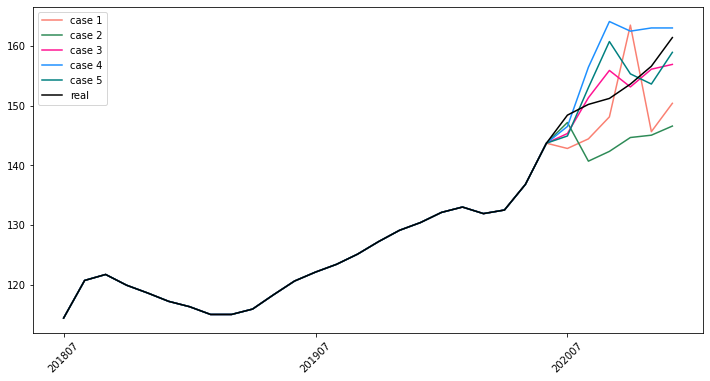

In [17]:
std=120
plt.figure(figsize=(12, 6))

x_date = df.iloc[std:,0]
plt.plot(x_date,case1[std:], color="salmon")
plt.plot(x_date,case2[std:], color="seagreen")
plt.plot(x_date,case3[std:], color="deeppink")
plt.plot(x_date,case4[std:], color="dodgerblue")
plt.plot(x_date,case5[std:], color="teal")
plt.plot(x_date,y[std:], color="black")
plt.legend(['case 1','case 2','case 3','case 4','case 5', 'real'])
plt.xticks(ticks=x_date, rotation=45)
plt.locator_params(axis='x', nbins=x_date.shape[0]/12)
plt.show()

In [ ]:
print(case1[10:].shape)
print(x_date.shape)

(140,)
(140,)


In [18]:
arr=[mean_squared_error(y_test,preds1),
     mean_squared_error(y_test,preds2),
     mean_squared_error(y_test,preds3),
    mean_squared_error(y_test,preds4),
    mean_squared_error(y_test,preds5),]
result=pd.DataFrame(arr).transpose()
result

,0,1,2,3,4
0,68.911433,100.725993,8.906377,55.176099,21.517182


In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_baseline.csv'):
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_baseline.csv', index=False, mode='w', encoding='utf-8-sig')
else:
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_baseline.csv', index=False, mode='a', encoding='utf-8-sig', header=False)